# __Springboard Data Science Capstone 3 Project__
# _Predicting the Price of Energy_

### Data Wrangling & Exploratory Data Analysis

##### _Ben Takacs_
###### __Python version 3.10.4__

### __Imports and File Location__

In [147]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from functions import load_table_data, load_csv_data, arima_mse, model_eval, decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

datapath = './data/'

### __Load Relevant Tables from Data Set__

4.3 - Consumption by Sector \
9.8 - Average price of electricity to ultimate customers


In [148]:
df43 = load_table_data('4-3.csv')
df98 = load_table_data('9-8.csv')

Data loaded from: 4-3.csv
Data loaded from: 9-8.csv


## __Data Wrangling__

### __Table 4.3 - Consumption by Sector__

In [149]:
print(df43.info(), '\n\n\n', df43.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 621 entries, 1973-01-01 to 2024-09-01
Data columns (total 12 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Natural Gas Consumed by the Residential Sector                                 621 non-null    float64
 1   Natural Gas Consumed by the Commercial Sector                                  621 non-null    float64
 2   Natural Gas Consumed by the Industrial Sector, Lease and Plant Fuel            621 non-null    float64
 3   Natural Gas Consumed by the Other Industrial Sector, CHP                       429 non-null    float64
 4   Natural Gas Consumed by the Other Industrial Sector, Non-CHP                   621 non-null    float64
 5   Natural Gas Consumed by the Other Industrial Sector, Total                     621 non-null    float64
 6   Natural

Focusing on Residential and Commercial sectors, so keep only those columns

In [150]:
df43 = df43.drop(columns=df43.columns[2:])
df43

Natural Gas Consumed by the Residential Sector  \
Month                                                        
1973-01-01                                         843.900   
1973-02-01                                         747.331   
1973-03-01                                         648.504   
1973-04-01                                         465.867   
1973-05-01                                         326.313   
...                                                    ...   
2024-05-01                                         171.858   
2024-06-01                                         122.740   
2024-07-01                                         107.035   
2024-08-01                                         105.350   
2024-09-01                                         113.532   

            Natural Gas Consumed by the Commercial Sector  
Month                                                      
1973-01-01                                        392.315  
1973-02-01                                        394.281  
1973-03-01                                        310.799  
1973-04-01                                        231.943  
1973-05-01                                        174.258  
...                                                   ...  
2024-05-01                                        176.062  
2024-06-01                                        153.302  
2024-07-01                                        146.175  
2024-08-01                                        149.161  
2024-09-01                                        157.511  

[621 rows x 2 columns]

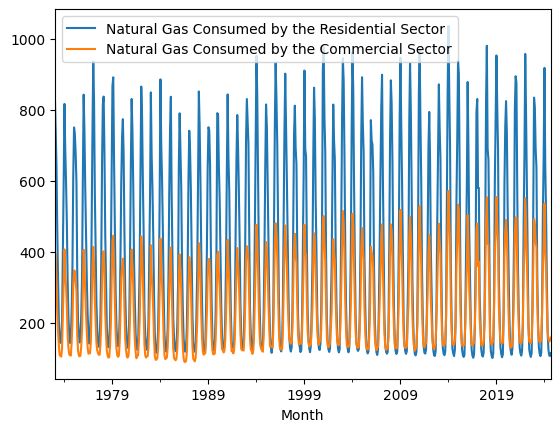

In [151]:
fig = df43.plot()
# fig.legend().set_visible(False)
plt.show()

See much larger variability in residential sector as compared to commercial

### __Table 9.8 - Average Price of Electricity to Ultimate Customers__

In [152]:
df98

Average Price of Electricity to Ultimate Customers, Residential  \
Month                                                                         
1976-01-01                                                NaN                 
1976-02-01                                                NaN                 
1976-03-01                                                NaN                 
1976-04-01                                                NaN                 
1976-05-01                                                NaN                 
...                                                       ...                 
2024-05-01                                              16.43                 
2024-06-01                                              16.42                 
2024-07-01                                              16.63                 
2024-08-01                                              16.63                 
2024-09-01                                              16.83                 

            Average Price of Electricity to Ultimate Customers, Commercial  \
Month                                                                        
1976-01-01                                                NaN                
1976-02-01                                                NaN                
1976-03-01                                                NaN                
1976-04-01                                                NaN                
1976-05-01                                                NaN                
...                                                       ...                
2024-05-01                                              12.48                
2024-06-01                                              13.07                
2024-07-01                                              13.58                
2024-08-01                                              13.39                
2024-09-01                                              13.47                

            Average Price of Electricity to Ultimate Customers, Industrial  \
Month                                                                        
1976-01-01                                                NaN                
1976-02-01                                                NaN                
1976-03-01                                                NaN                
1976-04-01                                                NaN                
1976-05-01                                                NaN                
...                                                       ...                
2024-05-01                                               7.88                
2024-06-01                                               8.40                
2024-07-01                                               8.81                
2024-08-01                                               8.72                
2024-09-01                                               8.51                

            Average Price of Electricity to Ultimate Customers, Transportation  \
Month                                                                            
1976-01-01                                                NaN                    
1976-02-01                                                NaN                    
1976-03-01                                                NaN                    
1976-04-01                                                NaN                    
1976-05-01                                                NaN                    
...                                                       ...                    
2024-05-01                                              12.21                    
2024-06-01                                              12.74                    
2024-07-01                                              13.15                    
2024-08-01                                          

In [153]:
print(df98.info())
print(df98.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 585 entries, 1976-01-01 to 2024-09-01
Data columns (total 6 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Average Price of Electricity to Ultimate Customers, Residential     507 non-null    float64
 1   Average Price of Electricity to Ultimate Customers, Commercial      507 non-null    float64
 2   Average Price of Electricity to Ultimate Customers, Industrial      507 non-null    float64
 3   Average Price of Electricity to Ultimate Customers, Transportation  261 non-null    float64
 4   Average Price of Electricity to Ultimate Customers, Other           156 non-null    float64
 5   Average Price of Electricity to Ultimate Customers, Total           507 non-null    float64
dtypes: float64(6)
memory usage: 32.0 KB
None
Average Price of Electricity to Ultimate Customers, Res

In [154]:
# Check what total column is
today = '2024-07-01'
df98.loc[today]
print(df98.drop(columns=df98.columns[:-1]).loc[today].mean())
print(df98['Average Price of Electricity to Ultimate Customers, Total'].loc[today])

13.76
13.76


Total column is average of other columns. But we'll just focus on residential and commercial

In [155]:
df98 = df98.drop(columns=df98.columns[2:])
df98

Average Price of Electricity to Ultimate Customers, Residential  \
Month                                                                         
1976-01-01                                                NaN                 
1976-02-01                                                NaN                 
1976-03-01                                                NaN                 
1976-04-01                                                NaN                 
1976-05-01                                                NaN                 
...                                                       ...                 
2024-05-01                                              16.43                 
2024-06-01                                              16.42                 
2024-07-01                                              16.63                 
2024-08-01                                              16.63                 
2024-09-01                                              16.83                 

            Average Price of Electricity to Ultimate Customers, Commercial  
Month                                                                       
1976-01-01                                                NaN               
1976-02-01                                                NaN               
1976-03-01                                                NaN               
1976-04-01                                                NaN               
1976-05-01                                                NaN               
...                                                       ...               
2024-05-01                                              12.48               
2024-06-01                                              13.07               
2024-07-01                                              13.58               
2024-08-01                                              13.39               
2024-09-01                                              13.47               

[585 rows x 2 columns]

<Figure size 640x480 with 0 Axes>

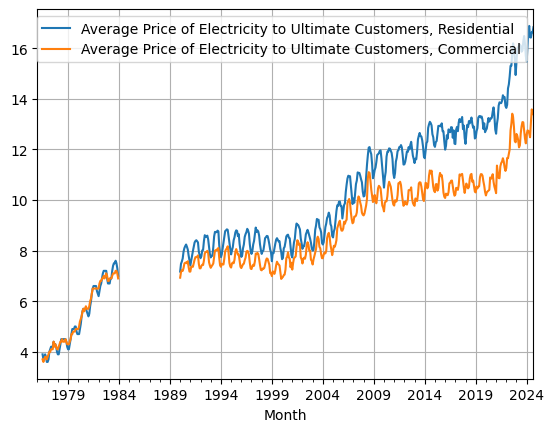

In [156]:
plt.figure()
df98.plot()
plt.grid(True)
plt.show()

Just take data from beyond ~1989

In [157]:
df98[('1989-1-1' < df98.index) & (df98.index < '1991-1-1')]

Average Price of Electricity to Ultimate Customers, Residential  \
Month                                                                         
1989-02-01                                                NaN                 
1989-03-01                                                NaN                 
1989-04-01                                                NaN                 
1989-05-01                                                NaN                 
1989-06-01                                                NaN                 
1989-07-01                                                NaN                 
1989-08-01                                                NaN                 
1989-09-01                                                NaN                 
1989-10-01                                                NaN                 
1989-11-01                                                NaN                 
1989-12-01                                                NaN                 
1990-01-01                                               7.17                 
1990-02-01                                               7.48                 
1990-03-01                                               7.57                 
1990-04-01                                               7.69                 
1990-05-01                                               7.96                 
1990-06-01                                               8.10                 
1990-07-01                                               8.18                 
1990-08-01                                               8.24                 
1990-09-01                                               8.15                 
1990-10-01                                               8.04                 
1990-11-01                                               7.80                 
1990-12-01                                               7.61                 

            Average Price of Electricity to Ultimate Customers, Commercial  
Month                                                                       
1989-02-01                                                NaN               
1989-03-01                                                NaN               
1989-04-01                                                NaN               
1989-05-01                                                NaN               
1989-06-01                                                NaN               
1989-07-01                                                NaN               
1989-08-01                                                NaN               
1989-09-01                                                NaN               
1989-10-01                                                NaN               
1989-11-01                                                NaN               
1989-12-01                                                NaN               
1990-01-01                                               6.93               
1990-02-01                                               7.15               
1990-03-01                                               7.23               
1990-04-01                                               7.20               
1990-05-01                                               7.31               
1990-06-01                                               7.49               
1990-07-01                                               7.52               
1990-08-01                                               7.53               
1990-09-01                                               7.50               
1990-10-01                                               7.58               
1990-11-01                                               7.34               
1990-12-01                                               7.17

NaN values end 1989-12-1, so take values beyond 1990

In [158]:
df98 = df98[df98.index > '1990']
df98

Average Price of Electricity to Ultimate Customers, Residential  \
Month                                                                         
1990-02-01                                               7.48                 
1990-03-01                                               7.57                 
1990-04-01                                               7.69                 
1990-05-01                                               7.96                 
1990-06-01                                               8.10                 
...                                                       ...                 
2024-05-01                                              16.43                 
2024-06-01                                              16.42                 
2024-07-01                                              16.63                 
2024-08-01                                              16.63                 
2024-09-01                                              16.83                 

            Average Price of Electricity to Ultimate Customers, Commercial  
Month                                                                       
1990-02-01                                               7.15               
1990-03-01                                               7.23               
1990-04-01                                               7.20               
1990-05-01                                               7.31               
1990-06-01                                               7.49               
...                                                       ...               
2024-05-01                                              12.48               
2024-06-01                                              13.07               
2024-07-01                                              13.58               
2024-08-01                                              13.39               
2024-09-01                                              13.47               

[416 rows x 2 columns]

<Axes: xlabel='Month'>

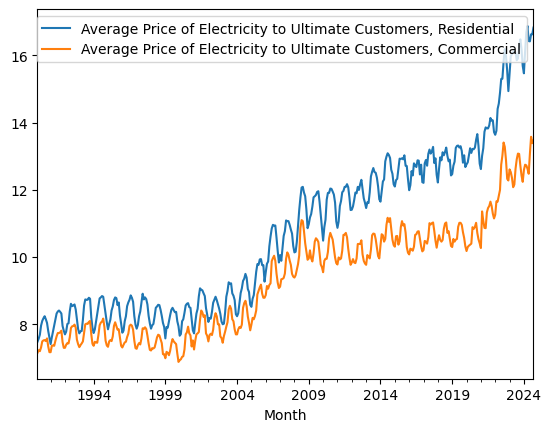

In [159]:
df98.plot()

If needed later we can truncate df43 to values after 1990 as well.

Final dataframes

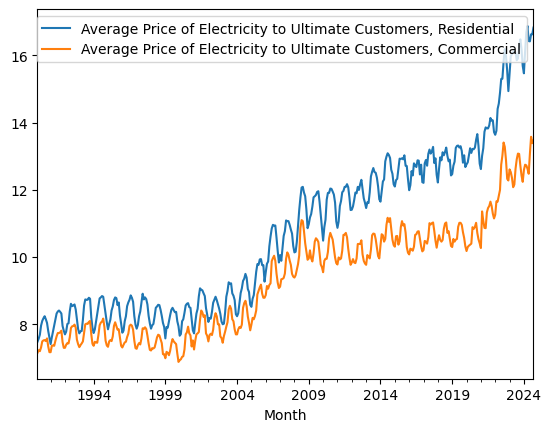

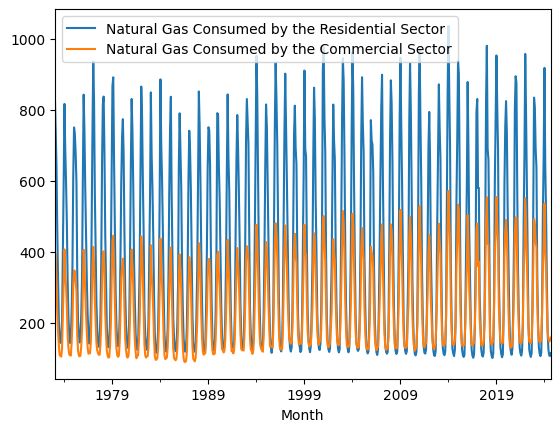

In [160]:
df98.plot()
df43.plot()
plt.show()

### __Save Data__

In [161]:
df43.to_csv(datapath + 'df43.csv')
df98.to_csv(datapath + 'df98.csv')

## __Exploratory Data Analysis__

### Average price of electricity to ultimate customers, commercial

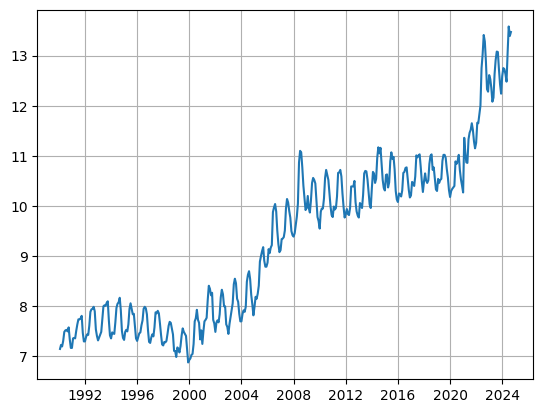

In [162]:
y98c = df98['Average Price of Electricity to Ultimate Customers, Commercial']

plt.figure()
plt.plot(y98c)
plt.grid(True)
plt.show()

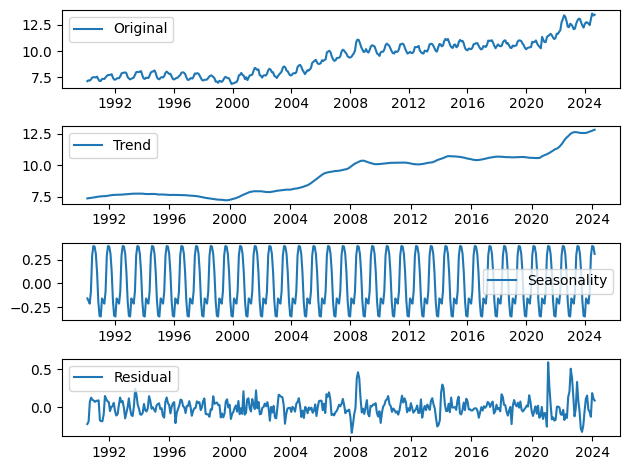

KPSS Probability: 0.01


/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_53629/2540204679.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  print('KPSS Probability: {}'.format(kpss(y98c)[1]))


In [163]:
# Check for stationarity of data
decomposition(y98c)
print('KPSS Probability: {}'.format(kpss(y98c)[1]))

p < 0.05, reject null hypothesis (stationary data), so we must transform it to be stationary by differencing

In [164]:
# y98c_d = pd.DataFrame(y98c.diff().dropna())
y98c_d = np.diff(y98c)
print('KPSS Probability: {}'.format(kpss(y98c_d)[1]))

KPSS Probability: 0.1


/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_53629/694795797.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print('KPSS Probability: {}'.format(kpss(y98c_d)[1]))


p > 0.05, fail to reject null hypothesis, so data is stationary and ready to be modeled. 

### Residential

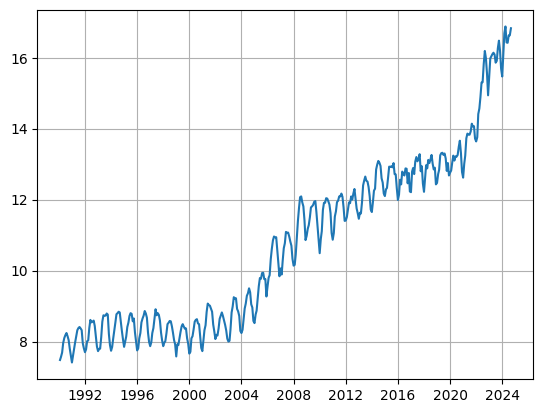

In [165]:
y98r = df98['Average Price of Electricity to Ultimate Customers, Residential']

plt.figure()
plt.plot(y98r)
plt.grid(True)
plt.show()

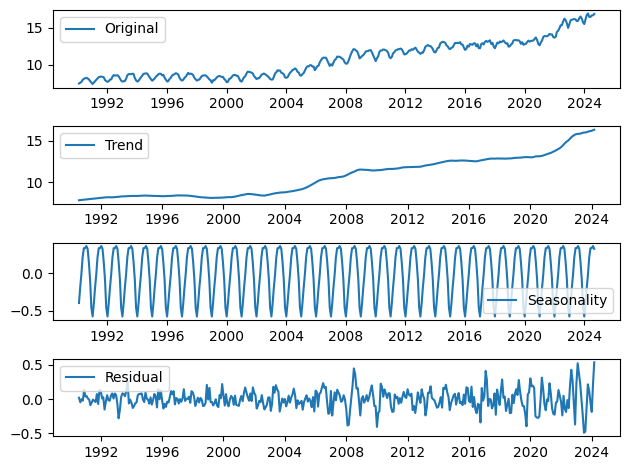

KPSS Probability: 0.01


/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_53629/2007027840.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  print('KPSS Probability: {}'.format(kpss(y98r)[1]))


In [166]:
decomposition(y98r)
print('KPSS Probability: {}'.format(kpss(y98r)[1]))

In [167]:
y98r_d = np.diff(y98r)
print('KPSS Probability: {}'.format(kpss(y98r_d)[1]))

KPSS Probability: 0.1


/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_53629/465628779.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print('KPSS Probability: {}'.format(kpss(y98r_d)[1]))


p > 0.05, fail to reject null hypothesis, so data is now stationary and ready to be modeled. 

## Natural gas consumed by residential sector

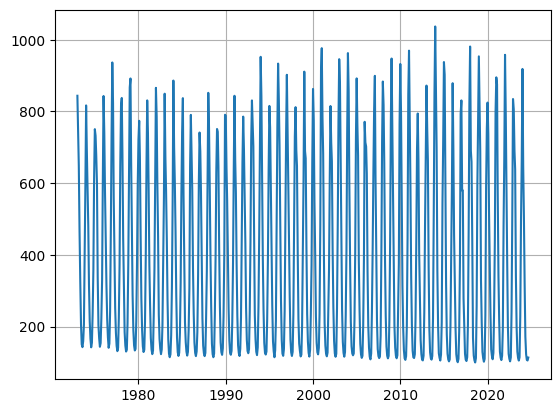

In [168]:
y43r = df43['Natural Gas Consumed by the Residential Sector']

plt.figure()
plt.plot(y43r)
plt.grid(True)
plt.show()

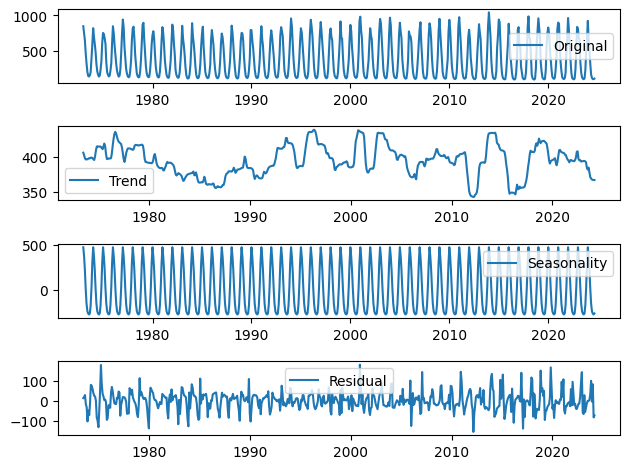

KPSS Probability: 0.1


/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_53629/2695942772.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print('KPSS Probability: {}'.format(kpss(y43r)[1]))


In [169]:
decomposition(y43r)
print('KPSS Probability: {}'.format(kpss(y43r)[1]))

data are stationary

## Natural gas consumed by commercial sector

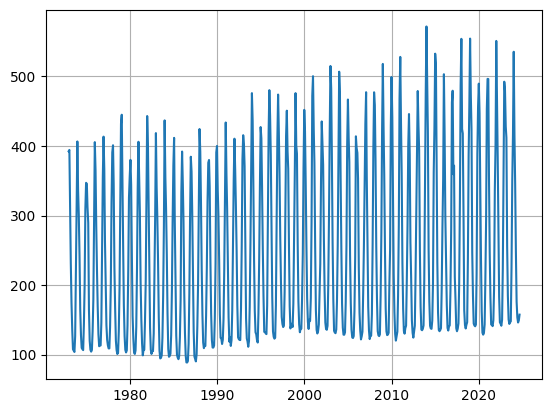

In [170]:
y43c = df43['Natural Gas Consumed by the Commercial Sector']

plt.figure()
plt.plot(y43c)
plt.grid(True)
plt.show()

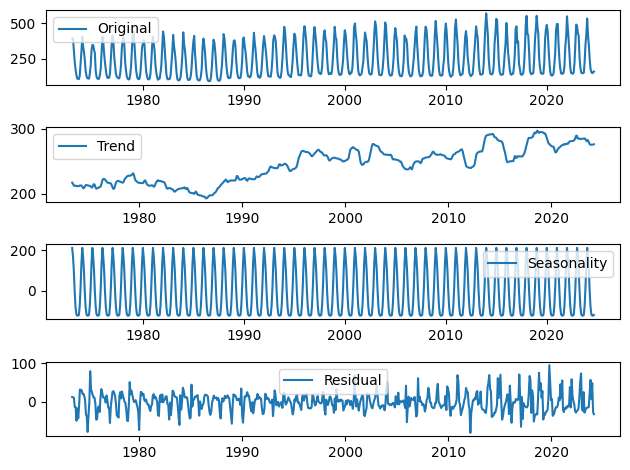

KPSS Probability: 0.01


/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_53629/3807229378.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  print('KPSS Probability: {}'.format(kpss(y43c)[1]))


In [171]:
decomposition(y43c)
print('KPSS Probability: {}'.format(kpss(y43c)[1]))

In [172]:
y43r_d = np.diff(y43r)
print('KPSS Probability: {}'.format(kpss(y43r_d)[1]))

KPSS Probability: 0.1


/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_53629/2338951983.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print('KPSS Probability: {}'.format(kpss(y43r_d)[1]))


data are stationary

## __Check for Trends in Data__

In [179]:
df = pd.merge(left=df98, right=df43, left_index=True, right_index=True)

In [180]:
df

Average Price of Electricity to Ultimate Customers, Residential  \
Month                                                                         
1990-02-01                                               7.48                 
1990-03-01                                               7.57                 
1990-04-01                                               7.69                 
1990-05-01                                               7.96                 
1990-06-01                                               8.10                 
...                                                       ...                 
2024-05-01                                              16.43                 
2024-06-01                                              16.42                 
2024-07-01                                              16.63                 
2024-08-01                                              16.63                 
2024-09-01                                              16.83                 

            Average Price of Electricity to Ultimate Customers, Commercial  \
Month                                                                        
1990-02-01                                               7.15                
1990-03-01                                               7.23                
1990-04-01                                               7.20                
1990-05-01                                               7.31                
1990-06-01                                               7.49                
...                                                       ...                
2024-05-01                                              12.48                
2024-06-01                                              13.07                
2024-07-01                                              13.58                
2024-08-01                                              13.39                
2024-09-01                                              13.47                

            Natural Gas Consumed by the Residential Sector  \
Month                                                        
1990-02-01                                         642.665   
1990-03-01                                         551.987   
1990-04-01                                         399.624   
1990-05-01                                         248.272   
1990-06-01                                         160.823   
...                                                    ...   
2024-05-01                                         171.858   
2024-06-01                                         122.740   
2024-07-01                                         107.035   
2024-08-01                                         105.350   
2024-09-01                                         113.532   

            Natural Gas Consumed by the Commercial Sector  
Month                                                      
1990-02-01                                        335.911  
1990-03-01                                        302.022  
1990-04-01                                        236.272  
1990-05-01                                        157.645  
1990-06-01                                        124.086  
...                                                   ...  
2024-05-01                                        176.062  
2024-06-01                                        153.302  
2024-07-01                                        146.175  
2024-08-01                                        149.161  
2024-09-01                                        157.511  

[416 rows x 4 columns]

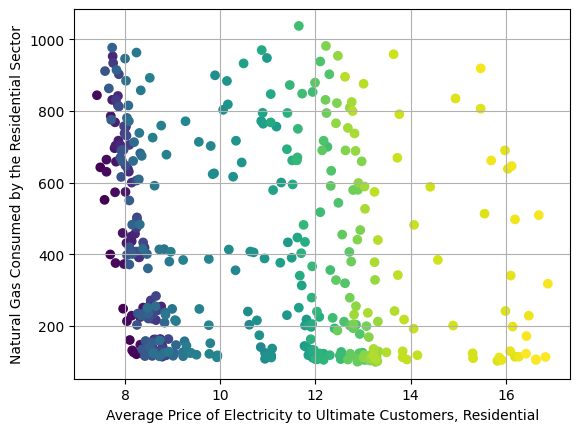

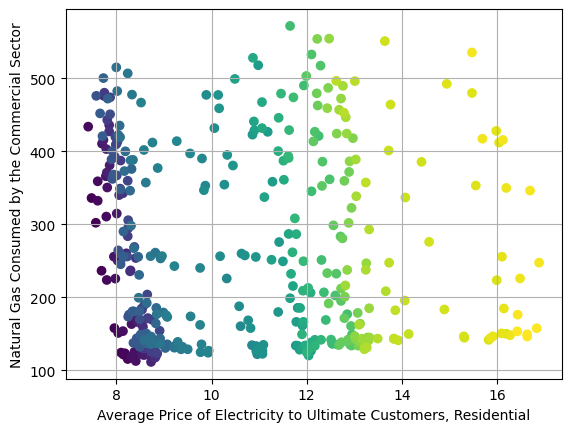

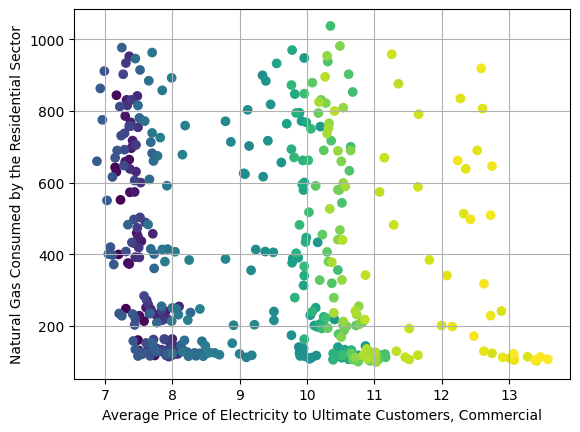

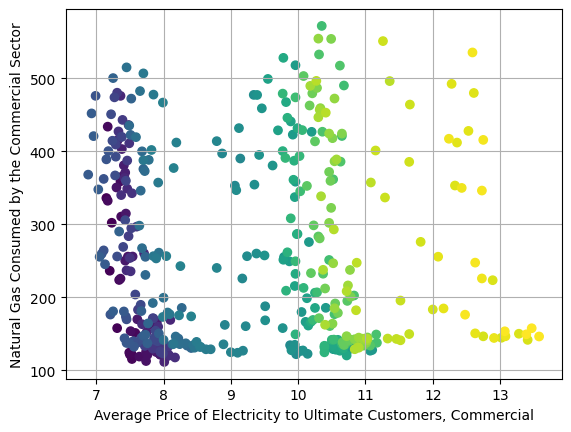

In [183]:
for i in range(2):
    for j in range(len(df.columns)-2):
        # if i != j:
        plt.figure()
        plt.scatter(df.iloc[:, i], df.iloc[:, j+2], c=df.index)
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[j+2])
        plt.grid(True)
        plt.show()
        # else:
        #     continue

No obvious, meaningful trends in data, so we'll include a few more tables and see if anything pops out.

### __Load New Tables__

In [184]:
df13 = load_table_data('1-3.csv')
df38 = load_table_data('3-8a.csv')


Data loaded from: 1-3.csv
Data loaded from: 3-8a.csv


In [185]:
df13.head()

Coal Consumption  \
Month                          
1973-01-01          1.166191   
1973-02-01          1.050588   
1973-03-01          1.046856   
1973-04-01          0.998979   
1973-05-01          1.014502   

            Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)  \
Month                                                                        
1973-01-01                                           2.397308                
1973-02-01                                           2.170646                
1973-03-01                                           2.057315                
1973-04-01                                           1.873535                
1973-05-01                                           1.765309                

            Petroleum Consumption (Excluding Biofuels)  \
Month                                                    
1973-01-01                                    3.185268   
1973-02-01                                    2.941986   
1973-03-01                                    2.942485   
1973-04-01                                    2.621315   
1973-05-01                                    2.836567   

            Total Fossil Fuels Consumption  \
Month                                        
1973-01-01                        6.747651   
1973-02-01                        6.163095   
1973-03-01                        6.044647   
1973-04-01                        5.493184   
1973-05-01                        5.613551   

            Nuclear Electric Power Consumption  \
Month                                            
1973-01-01                            0.068103   
1973-02-01                            0.064634   
1973-03-01                            0.072494   
1973-04-01                            0.064070   
1973-05-01                            0.062111   

            Hydroelectric Power Consumption  Geothermal Energy Consumption  \
Month                                                                        
1973-01-01                         0.089562                       0.000490   
1973-02-01                         0.079544                       0.000448   
1973-03-01                         0.088284                       0.000464   
1973-04-01                         0.083152                       0.000542   
1973-05-01                         0.085643                       0.000505   

            Solar Energy Consumption  Wind Energy Consumption  \
Month                                                           
1973-01-01                       NaN                      NaN   
1973-02-01                       NaN                      NaN   
1973-03-01                       NaN                      NaN   
1973-04-01                       NaN                      NaN   
1973-05-01                       NaN                      NaN   

            Biomass Energy Consumption  Total Renewable Energy Consumption  \
Month                                                                        
1973-01-01                    0.129787                            0.219839   
1973-02-01                    0.117338                            0.197330   
1973-03-01                    0.129938                            0.218686   
1973-04-01                    0.125636                            0.209330   
1973-05-01                    0.129834                            0.215982   

            Total Primary Energy Consumption  
Month                                         
1973-01-01                          7.039731  
1973-02-01                          6.428796  
1973-03-01                          6.339964  
1973-04-01                          5.770589  
1973-05-01                          5.895781

In [186]:
df38.head()

Distillate Fuel Oil Consumed by the Residential Sector  \
Month                                                                
1973-01-01                                            308.231        
1973-02-01                                            263.315        
1973-03-01                                            205.950        
1973-04-01                                            144.100        
1973-05-01                                            122.203        

            Propane Consumed by the Residential Sector  \
Month                                                    
1973-01-01                                      92.111   
1973-02-01                                      80.942   
1973-03-01                                      59.985   
1973-04-01                                      47.684   
1973-05-01                                      33.668   

            Kerosene Consumed by the Residential Sector  \
Month                                                     
1973-01-01                                       36.213   
1973-02-01                                       31.031   
1973-03-01                                       17.904   
1973-04-01                                       14.082   
1973-05-01                                       11.803   

            Total Petroleum Consumed by the Residential Sector  \
Month                                                            
1973-01-01                                            436.556    
1973-02-01                                            375.287    
1973-03-01                                            283.839    
1973-04-01                                            205.866    
1973-05-01                                            167.675    

            Distillate Fuel Oil Consumed by the Commercial Sector  \
Month                                                               
1973-01-01                                             99.020       
1973-02-01                                             84.591       
1973-03-01                                             66.161       
1973-04-01                                             46.292       
1973-05-01                                             39.261       

            Propane Consumed by the Commercial Sector  \
Month                                                   
1973-01-01                                     18.525   
1973-02-01                                     16.420   
1973-03-01                                     14.072   
1973-04-01                                     12.182   
1973-05-01                                     10.425   

            Kerosene Consumed by the Commercial Sector  \
Month                                                    
1973-01-01                                      10.316   
1973-02-01                                       8.840   
1973-03-01                                       5.100   
1973-04-01                                       4.012   
1973-05-01                                       3.363   

            Motor Gasoline Consumed by the Commercial Sector  \
Month                                                          
1973-01-01                                             6.759   
1973-02-01                                             6.423   
1973-03-01                                             7.196   
1973-04-01                                             6.994   
1973-05-01                                             7.631   

            Petroleum Coke Consumed by the Commercial Sector  \
Month                                                          
1973-01-01                                               NaN   
1973-02-01                                               NaN   
1973-03-01                                               NaN   
1973-04-01                                               NaN   
1973-05-01                                               NaN   

            Residual Fuel Oil Consumed by the Co

In [189]:
dfc1 = pd.read_excel('./data/Table C1.xlsx', skiprows=[x for x in range(8)] + [9], index_col=0, header=[0])
dfc1.set_index(pd.to_datetime(dfc1.index, format='%Y'), inplace=True)

In [190]:
# dfc1 = dfc1[['Total Resident Population, United States', 'U.S. Gross Domestic Product, Real']]
# dfc1

In [191]:
df = pd.merge(left=df, right=df13, left_index=True, right_index=True)
df = pd.merge(left=df, right=df38, left_index=True, right_index=True)
# df = pd.merge(left=df, right=dfc1, left_index=True, right_index=True)

In [192]:
df

Average Price of Electricity to Ultimate Customers, Residential  \
Month                                                                         
1990-02-01                                               7.48                 
1990-03-01                                               7.57                 
1990-04-01                                               7.69                 
1990-05-01                                               7.96                 
1990-06-01                                               8.10                 
...                                                       ...                 
2024-05-01                                              16.43                 
2024-06-01                                              16.42                 
2024-07-01                                              16.63                 
2024-08-01                                              16.63                 
2024-09-01                                              16.83                 

            Average Price of Electricity to Ultimate Customers, Commercial  \
Month                                                                        
1990-02-01                                               7.15                
1990-03-01                                               7.23                
1990-04-01                                               7.20                
1990-05-01                                               7.31                
1990-06-01                                               7.49                
...                                                       ...                
2024-05-01                                              12.48                
2024-06-01                                              13.07                
2024-07-01                                              13.58                
2024-08-01                                              13.39                
2024-09-01                                              13.47                

            Natural Gas Consumed by the Residential Sector  \
Month                                                        
1990-02-01                                         642.665   
1990-03-01                                         551.987   
1990-04-01                                         399.624   
1990-05-01                                         248.272   
1990-06-01                                         160.823   
...                                                    ...   
2024-05-01                                         171.858   
2024-06-01                                         122.740   
2024-07-01                                         107.035   
2024-08-01                                         105.350   
2024-09-01                                         113.532   

            Natural Gas Consumed by the Commercial Sector  Coal Consumption  \
Month                                                                         
1990-02-01                                        335.911          1.465526   
1990-03-01                                        302.022          1.528733   
1990-04-01                                        236.272          1.449803   
1990-05-01                                        157.645          1.477073   
1990-06-01                                        124.086          1.604918   
...                                                   ...               ...   
2024-05-01                                        176.062          0.560214   
2024-06-01                                        153.302          0.717796   
2024-07-01                                        146.175          0.832522   
2024-08-01                                        149.161          0.813632   
2024-09-01                                        157.511          0.662560   

            Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)  \
Month                                                   

In [ ]:

print(len(df.columns)-2)

25


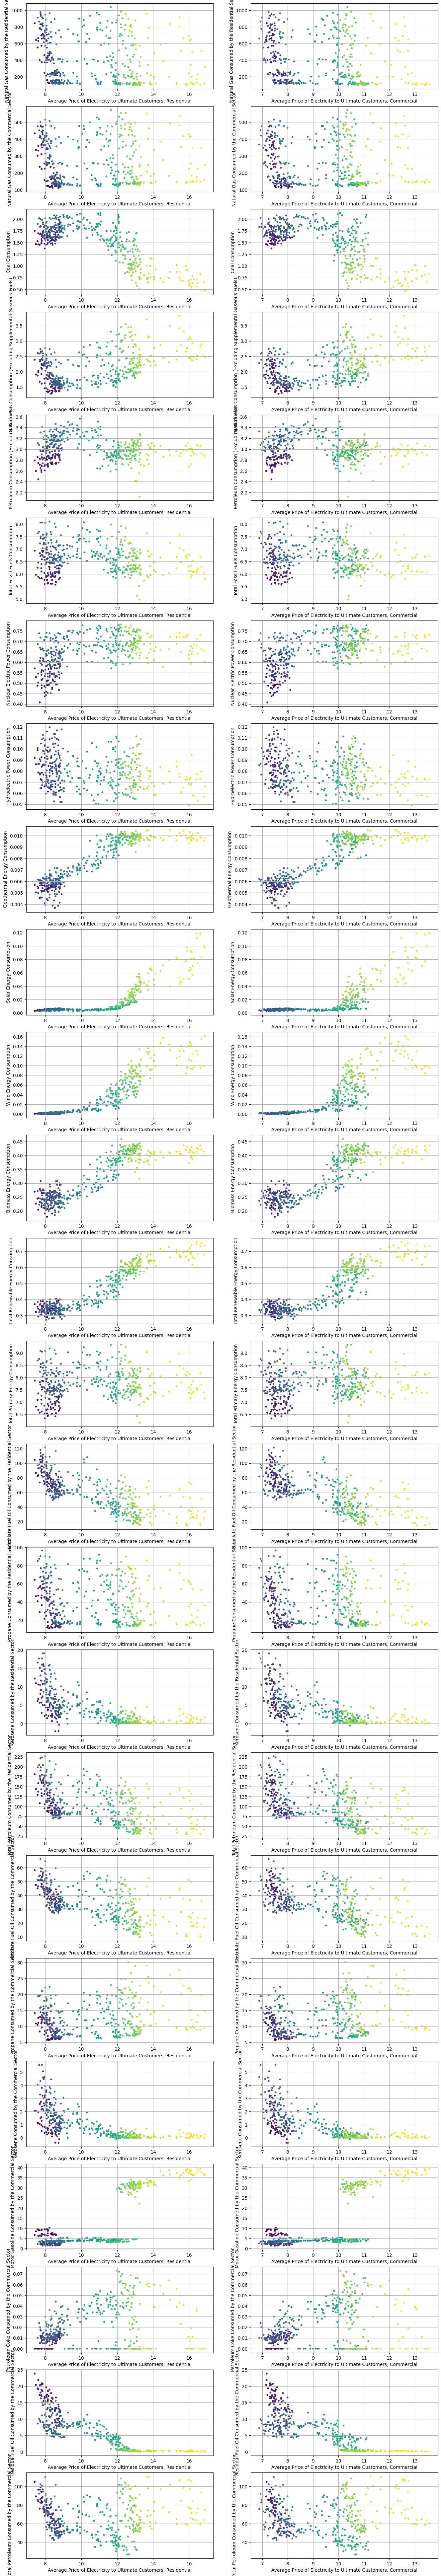

In [235]:
gridlen = int(np.sqrt(round(len(df.columns)-2, 0)))

fig, axs = plt.subplots(len(df.columns)-2, 2, figsize=(16, 100))
# axs = axs.flatten()

for i in range(2):
    for j in range(len(df.columns)-2):
        axs[j, i].scatter(df.iloc[:, i], df.iloc[:, j+2], c=df.index, marker='.')
        axs[j, i].set_xlabel(df.columns[i])
        axs[j, i].set_ylabel(df.columns[j+2])
        axs[j, i].grid(True)

plt.show()

Looking through comparisons with the average price of electricity, we do see some trends between consumption and price, a generally increasing trend with renewable energy types and some decay with fossil fuel types that are not used anymore (residual fuel oil, kerosene).

## __Conclusion__

We were able to create stationary data for all variables we're interested in, and found some trends between different types of energy consumption and price. We'll continue to explore these trends in the next section.